# Exercises 10

The exercises consist of running a parallelized Genetic algorithm in order to numerically solve the Travelling Salesman problem in $N$ independent *Continents*, every *ntime* steps of the **Genetic** algorithm the best chromosomes of a population in a node replace the worst of the population in another node. The problem follows the same ground rules that have been set for the problem in **Exercises 09**.

#### Coding choices
Some modifications have been made to the original code, parallelization aside:

1. Vector (Standard Library): using the code written for **Exercises 09**, the structure based on vectors remains, but in order to parallelize the code, I had to convert the population into a dynamuc C-array that could have been more easily accessed using pointers by the *MPI_Isend* and *MPI_Recv* functions;

2. Parallelization: the main purpose of the Exercise is to learn parallel coding. In this code, after the standard initialization of a parallelized code, I had to use 4 main functions:
    * MPI_Isend: I chose to use the non-blocking version of the **Send** function because after *ntime* steps each node had to randomly share its best elements to another node, so eash node had to start sending its data and, at the same time, start receiving the data from another node,
    * MPI_Recv: I chose the blocking version of this function, because I wanted the code to stop in order to be sure each node was at the same point, and it didn't stop sending once it finished receiving,
    * MPI_Bcast: the broadcast function has been very useful to share between all nodes the schedule (randomly generated in the node 0) of the elements exchange,
    * MPI_Wtime: I wanted to keep trace of the execution time to estimate an effective improvement of performances in comparison with the non-parallel code, so I had to implement the *MPI_Wtime* function which returns the current time as a double, and recalling the function at the end of the execution, it is possible to calculate the $\Delta t$ for each node;
    
3. Output on file:
    * Best Path Length: the best path length in function of the number of steps has been printed on *nprocesses* files called *output_best* + rank + *.dat*, each line contains the number of the step and the length of the best path,
    * Best Half Mean Path Lenght: the mean of the path length of the best half of the population in function of the number of steps has been printed on *nprocesses* files called *output_mean* + rank + *.dat*, each line contains the number of the step and the mean length of the best half of the population,
    * Best Path: the best path for each node is stored in a file called *output_bestPath* + rank + *.dat*, the first line is the title and contains the length of the path, the next lines contains the indeces of the *ncities* cities in the right order.

4. Steady state: the code written for **Exercises 09** exploited the **Steady state Genetic** algorithm, and I chose to continue using this paradigm for this Exercise.

5. Small changes in Crossing Over routine: the crossing over occurance probability has been brought from 80% to 100%, and even the functionality has changed, indeed, now the two worst elements of the previous population are substituted with the two new chromosomes created bu the crossing over of the two selected ones.

#### Conclusions
Parallelization, meant as tool to increase the genetic variability, is certainly a powerful instrument to decrease the time to solve the problem, the natural comparison is the migration phenomenon.

## Exercises 10.2

This exercise consist of testing the parallelize code in relation to 
The two plots below show the trends of the length of the best element of the population and the mean of the length of paths in the best half of the population, as asked in **Exercises 09**. The code runs for 50000 steps, migrations occur every 5000 steps (9 migrations) and involve 20 elements, which is made of 200 elements, bigger population have been tested, but didn't improve the result, because the increased population can bring a better genetic diversity, but also increases a lot the execution time of the code.

The simulation runs a **Genetic** algorithm with a population of 200 elements, each representing the path which connects the 50 american state capitals (starting from Montgomery, Alabama), performing 50000 steady-state steps, with random directed migrations every 5000 steps, and its execution time is 150 $\div$ 200 seconds ($\sim$ 3 minutes) for each of the 10 nodes. Very often the code provides the same best paths among each continent, this is due to the migrations.

The same simulation has run without any migration on 10 independent nodes and on a single node (for this data has been taken the node with the best result among the nodes of the simulation without migrations). It is surely notable that the execution time has not been effected by the lack of the migrations, instead, the results are quite different, and in general a worse, as shown in the charts below. There will be shown the best and the worst result, they represents the delta of scenarios that can be faced by running a large number of independent simulations, in general this method only gives a time advantage, but does not increase the genetic variability.

Note: each node used different seeds for their simulations (the seed for node 0 is provided by the user of the code via command line, and the seeds for the other nodes are obtained using the following formula $seed_{rank} = (rank + 1) \cdot seed_0$), in order to have more independent results.

Length of the best element of the population (with migrations):
L = 268.371
Length of the best element of the best population (without migrations):
L = 272.687
Length of the best element of the worst population (without migrations):
L = 283.839


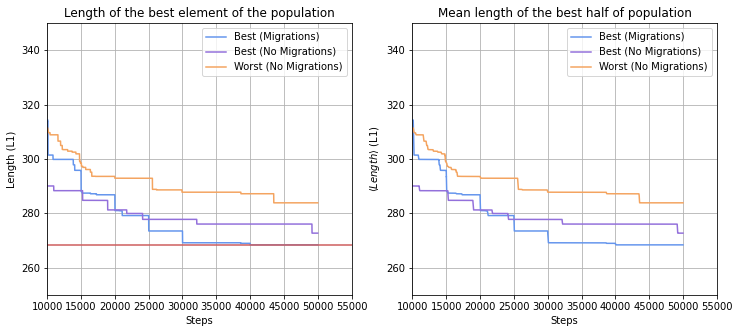

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# seed 27
# simulation parameters
ncities = 50
# figure setup
fig = plt.figure(figsize=[12, 5])
# data loading
steps = np.loadtxt("./dataEx1/migration/best/output_best0.dat", usecols = 0)
pathLeng = np.loadtxt("./dataEx1/migration/best/output_best0.dat", usecols = 1)
pathMean = np.loadtxt("./dataEx1/migration/mean/output_mean0.dat", usecols = 1)
pathLeng_in_b = np.loadtxt("./dataEx1/independent/best/output_best6.dat", usecols = 1)
pathMean_in_b = np.loadtxt("./dataEx1/independent/mean/output_mean6.dat", usecols = 1)
pathLeng_in_w = np.loadtxt("./dataEx1/independent/best/output_best2.dat", usecols = 1)
pathMean_in_w = np.loadtxt("./dataEx1/independent/mean/output_mean2.dat", usecols = 1)
nsteps = np.size(steps)
# Length of the best element of the population
print("Length of the best element of the population (with migrations):")
print("L =", pathLeng[nsteps - 1])
print("Length of the best element of the best population (without migrations):")
print("L =", pathLeng_in_b[nsteps - 1])
print("Length of the best element of the worst population (without migrations):")
print("L =", pathLeng_in_w[nsteps - 1])
fig.add_subplot(121)
plt.plot(steps, pathLeng, color="cornflowerblue")
plt.plot(steps, pathLeng_in_b, color="mediumpurple")
plt.plot(steps, pathLeng_in_w, color="sandybrown")
plt.axhline(y=pathLeng[nsteps - 1], color="indianred")
plt.title("Length of the best element of the population")
plt.xlabel("Steps")
plt.ylabel("Length (L1)")
plt.legend(["Best (Migrations)", "Best (No Migrations)", "Worst (No Migrations)"], loc="best")
plt.xlim(10000, 55000)
plt.ylim(250, 350)
plt.grid()
# Mean length of the best half of population
fig.add_subplot(122)
plt.plot(steps, pathMean, color="cornflowerblue")
plt.plot(steps, pathMean_in_b, color="mediumpurple")
plt.plot(steps, pathMean_in_w, color="sandybrown")
plt.title("Mean length of the best half of population")
plt.xlabel("Steps")
plt.ylabel(r"$\langle Length \rangle$ (L1)")
plt.legend(["Best (Migrations)", "Best (No Migrations)", "Worst (No Migrations)"], loc="best")
plt.xlim(10000, 55000)
plt.ylim(250, 350)
plt.grid()
# plot
plt.show()

The plot below shows the best path of the salesman, in this case the path is clockwise, it is obvious that following the path in the other direction does not affect its length. It is only shown the best path obtained in the simulation which include migrations, which is the best obtained among all the protocols and among a large number of simulations made with different seeds.

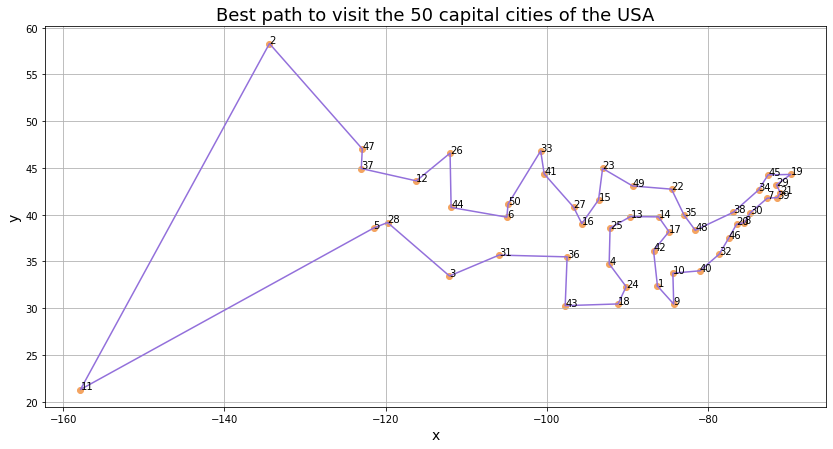

In [2]:
fig = plt.figure(1, figsize=[14, 7])
# data loading
bestPathLabel = np.loadtxt("./dataEx1/migration/bestPath/output_bestPath0.dat", skiprows=1)
# print(bestPathLabel)
citiesL = np.arange(50) + 1
citiesX = np.loadtxt("./dataEx1/american_capitals.dat", usecols = 2)
citiesY = np.loadtxt("./dataEx1/american_capitals.dat", usecols = 3)
# preparing array for plotting
bestPathX = np.zeros(ncities + 1)
bestPathY = np.zeros(ncities + 1)
for ic in range(ncities):
    bestPathX[ic] = citiesX[int(bestPathLabel[ic]) - 1]
    bestPathY[ic] = citiesY[int(bestPathLabel[ic]) - 1]
bestPathX[ncities] = citiesX[0]
bestPathY[ncities] = citiesY[0]
# plot
plt.plot(bestPathX, bestPathY, color="mediumpurple")
plt.scatter(citiesX, citiesY, color="sandybrown")
for i in range(ncities):
    plt.text(citiesX[i], citiesY[i], str(i+1))
plt.title("Best path to visit the 50 capital cities of the USA", fontsize=18)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid()
plt.show()